Implementing k-Means clustering algorithm for a random dataset

In [2]:
#Importing required libraries

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
#Generating random dataset

np.random.seed()

In [80]:
# make_blobs: generate isotropic guassian blobs for clustering
# I will be defining fixed parameters
# I/P : n_samples,centers,cluster_std
# O/P: X([n_samples,n_features],Y[n_samples]

X,Y = make_blobs(n_samples=2000,centers=[[2,3],[6,9],[5,1]], cluster_std = 0.6)



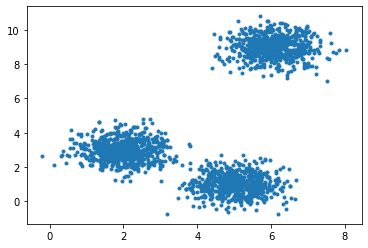

In [81]:
#Displaying the scatter plot of randomly generated data

plt.scatter(X[:,0],X[:,1],marker='.')


In [82]:
#Setting up the kmeans
# I'll be using 3 parameters in kmeans
# init: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
# n_clusters: The number of clusters to form as well as the number of centroids to generate.
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.

k_means = KMeans(init = "k-means++",n_clusters = 3, n_init = 10)

In [83]:
#Fitting the model with I/P X
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
# Grabbing labels for each data point
k_means_labels = k_means.labels_
k_means_labels

array([2, 2, 2, ..., 1, 2, 1])

In [85]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[1.98915591, 2.9732403 ],
       [6.05723698, 8.99772873],
       [5.03367551, 1.00257967]])

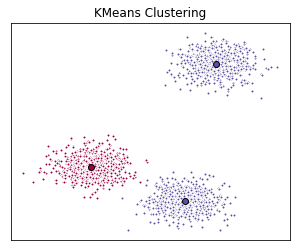

In [90]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(5, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0,2,len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.

for k, col in zip(range(len([[2,3],[6,9],[5,1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans Clustering')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

